In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing import image
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [4]:
img_width	=	150	
img_height	=	150	
model=keras.applications.InceptionResNetV2(weights="imagenet",	include_top=False,	input_shape=(img_width,	img_height,	3))	

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
219062272/219055592 [==============================] - 5s 0us/step


In [0]:
#	Freeze	all	lower	layers		
for	layer	in	model.layers:
		layer.trainable	=	False

In [6]:
#	add	custom	layers	
x	=	model.output
x	=	keras.layers.Flatten()(x)			
x	=	keras.layers.Dense(64,	activation="relu")(x)	
x	=	keras.layers.Dropout(0.5)(x)	
output	=	keras.layers.Dense(1,	activation="sigmoid")(x)	
print(model.summary())	


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

In [0]:
#	data	augmentation	for	training	
train_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	shear_range=0.2, zoom_range=0.2,	horizontal_flip=True)	
	
#	no	augmentation	for	testing:	rescaling	only	
test_datagen	=	keras.preprocessing.image.ImageDataGenerator(rescale=1./255,	horizontal_flip=False)		
batch_size	=	20	
	
#	a	generator	that	reads	images	found	in	'data/train',	and	generates	batches	of	augmented	image	data	
train_generator	=	train_datagen.flow_from_directory(	
								'/content/drive/My Drive/data/train',		#	directory	with	training	data	
								target_size=(img_height,	img_width),		#	all	images	will	be	resized	to	150x150	
								color_mode="rgb",	
								batch_size=batch_size,	
								class_mode='binary')		#	only	two	classes,	so	we	are	not	using	categorical	labels	
	
#	this	is	a	similar	generator,	for	validation	data	
valid_generator	=	test_datagen.flow_from_directory('/content/drive/My Drive/data/val',	#	directory	with	validation	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary')	

#	this	is	a	similar	generator,	for	test	data	
test_generator	=	test_datagen.flow_from_directory('/content/drive/My Drive/data/test',	#	directory	with	test	data	
								target_size=(img_height,	img_width), color_mode="rgb",	batch_size=batch_size, class_mode='binary',
                shuffle = False)	

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [0]:
model_final	=	keras.models.Model(inputs=model.input,	outputs=output)	
	
model_final.compile(loss='binary_crossentropy',	optimizer='rmsprop', metrics=['accuracy'])	

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model_final.fit_generator(train_generator,steps_per_epoch=2000	//	batch_size, epochs=20,
                                    validation_data=valid_generator, validation_steps=400	//	batch_size)	

Epoch 1/20
100/100 [==============================] - 628s 6s/step - loss: 0.8511 - acc: 0.7060 - val_loss: 0.2987 - val_acc: 0.9400
Epoch 2/20
100/100 [==============================] - 21s 207ms/step - loss: 0.4329 - acc: 0.8110 - val_loss: 0.2136 - val_acc: 0.9700
Epoch 3/20
100/100 [==============================] - 21s 212ms/step - loss: 0.4308 - acc: 0.8315 - val_loss: 0.0978 - val_acc: 0.9700
Epoch 4/20
100/100 [==============================] - 21s 213ms/step - loss: 0.3504 - acc: 0.8565 - val_loss: 0.4953 - val_acc: 0.9600
Epoch 5/20
100/100 [==============================] - 21s 213ms/step - loss: 0.3744 - acc: 0.8475 - val_loss: 0.6634 - val_acc: 0.9150
Epoch 6/20
100/100 [==============================] - 21s 210ms/step - loss: 0.3280 - acc: 0.8660 - val_loss: 0.8447 - val_acc: 0.9175
Epoch 7/20
100/100 [==============================] - 21s 212ms/step - loss: 0.3196 - acc: 0.8745 - val_loss: 0.2741 - val_acc: 0.9625
Epoch 8/20
100/100 [==============================] - 21s

(0, 1)

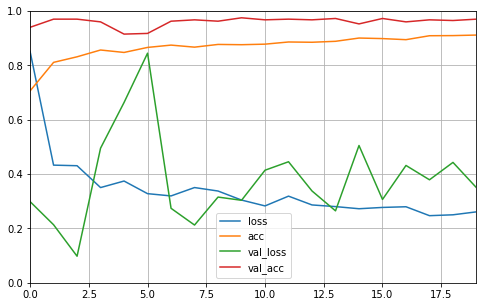

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))	
plt.grid(True)	
plt.gca().set_ylim(0,1)

In [0]:
result = model_final.evaluate_generator(test_generator)

In [0]:
result

[0.29393211201779307, 0.9775]

In [0]:
model_final.save('csce508_finalproject_97_75_percent.h5')

In [0]:
""" Add	predict	step:	
– Separate	the	correctly	and	incorrectly	classified	samples	of	each	class	
– Count	them	
– Inspect	them:	form	conjectures	of	why	the	samples	were	mis-classified	"""

In [0]:
# predict test data and save result in a variable pred
pred= model_final.predict_generator(test_generator)


In [0]:
# save true test labels into a variable
test_labels=test_generator.classes

In [0]:
categories = ["cats", "dogs"]

In [0]:
# turn the predicted probabilities for classes to category of 0 and 1
for i in range(len(pred)):
  if pred[i] > 0.5:
     pred[i] = 1
  else:
    pred[i]=0

In [0]:
# Check the number of correct and incorrect predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,pred)

array([[388,  12],
       [  6, 394]])

In [0]:
# check the classification metrics of the test data
from sklearn import metrics
classification_metrics = metrics.classification_report(test_labels,pred, target_names = categories)
print(classification_metrics)

              precision    recall  f1-score   support

         cat       0.98      0.97      0.98       400
         dog       0.97      0.98      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [0]:
from sklearn.metrics import accuracy_score
print("Test Accuracy of the model is : " + str(accuracy_score(test_labels,pred)))
print(str(accuracy_score(test_labels,pred, normalize=False)) + " images out of " + str(len(pred)) + " was predicted correctly")

Test Accuracy of the model is : 0.9775
782 images out of 800 was predicted correctly


In [0]:
import numpy as np
import os
import cv2
from tqdm import tqdm
DATADIR = "/content/drive/My Drive/data/test"

test_dataset = [] #initialize an empty list to store the loaded images and their respective labels

def create_dataset():
    for category in categories:  # do for all folders in the dataset

        path = os.path.join(DATADIR,category)  # create path to all the folders
        label = categories.index(category)  # get the classification label as the index of the folders in the dataset
       
        for img in tqdm(os.listdir(path)):  # iterate over each image in all the folders
            try:
                img = cv2.imread(os.path.join(path,img)) # read image
                img = cv2.resize(img, (150, 150)) # resize the images for uniformity and model acceptability
                img = img.astype(np.float32) # convert images to float21
                test_dataset.append([img, label]) # add the image and its label to the dataset's list
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass   

create_dataset()

100%|██████████| 400/400 [00:02<00:00, 166.23it/s]


In [0]:
#Split the test dataset into images and their respective labels    
x = []
y = []
for img,label in test_dataset:
    x.append(img)
    y.append(label)

In [0]:
#convert the test dataset from list to Numpy N-dimensional array 
X = np.asarray(x)
X = X/255
Y = np.asarray(y)

In [0]:
# One-hot encode test data labels 
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
num_classes = 2
Y = np_utils.to_categorical(Y, num_classes)

In [0]:
# create a subset of the test images for prediction and visualization
test = X[390:410]

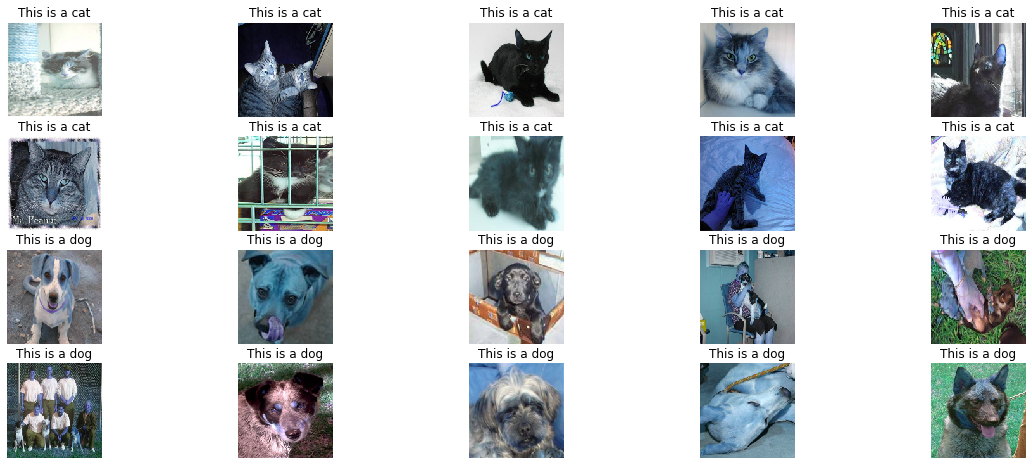

In [0]:
# Predict and visualize
predicted_labels = []
predictions=[]
plt.figure(figsize = (20,8))
for num, images in enumerate(test):
  j = np.expand_dims(images, axis = 0)
  prediction = model_final.predict(j)
  predictions.append(prediction)
  if prediction[0] > 0.5:
     prediction[0] = 1
  else:
    prediction[0] =0
  label = categories[int(prediction[0])]
  predicted_labels.append(label)
  plt.subplot(4, 5, num+1)
  plt.title( 'This is a ' + label[:-1])
  plt.axis('off')
  plt.imshow(images)

In [0]:
# create a data set and true labels of cats only category
X_test_cats_only = X[:400]
Y_test_cats_only = y[:400]


In [0]:
# Make predictions on cats only
prediction_cats= model_final.predict(X_test_cats_only)

In [0]:
# convert the predicted probabilities for classes to category of 0 and 1
for i in range(len(prediction_cats)):
  if prediction_cats[i] > 0.5:
     prediction_cats[i] = 1
  else:
    prediction_cats[i]=0

In [0]:
#check the classification metrics of the cats only test data
from sklearn import metrics
classification_metrics = metrics.classification_report(Y_test_cats_only,prediction_cats, target_names = categories)
print(classification_metrics)

              precision    recall  f1-score   support

        cats       1.00      0.94      0.97       400
        dogs       0.00      0.00      0.00         0

    accuracy                           0.94       400
   macro avg       0.50      0.47      0.48       400
weighted avg       1.00      0.94      0.97       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
# Check the number of correct and incorrect preducutions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_cats_only,prediction_cats)

array([[375,  25],
       [  0,   0]])

In [0]:
# Get the location of the incorrect predictions for visualization and further analysis
indices = [i for i,v in enumerate(prediction_cats) if prediction_cats[i]!=Y_test_cats_only[i]]
subset_of_wrongly_predicted = [X_test_cats_only[i] for i in indices ]

In [0]:
# confirm that the number is same as obtained from confusion matrix
len(indices)

25

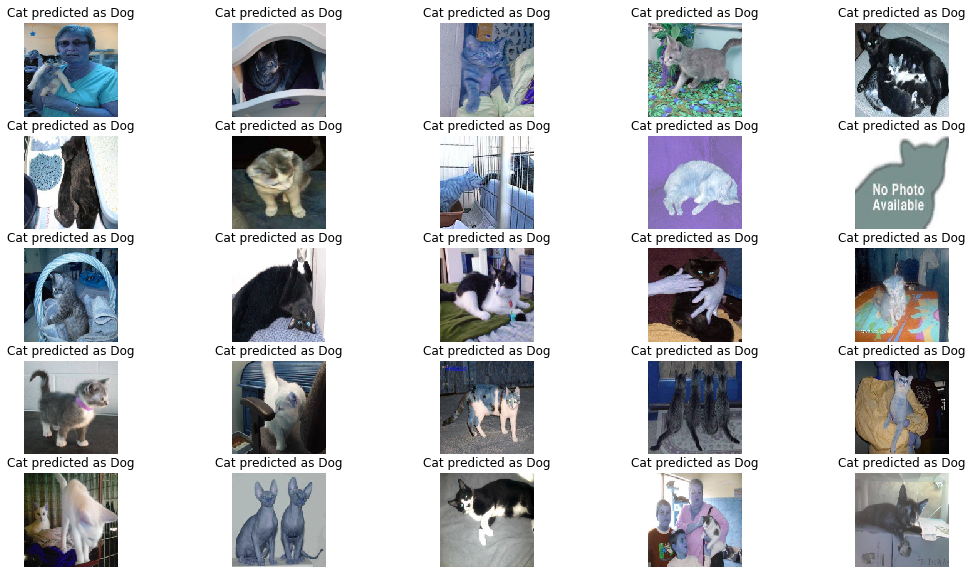

In [0]:
plt.figure(figsize = (18,10))
for num, images in enumerate(subset_of_wrongly_predicted):
  plt.subplot(5, 5, num+1)
  plt.title( 'Cat predicted as Dog')
  plt.axis('off')
  plt.imshow(images)

In [0]:
# create a data set and true labels of cats only category
X_test_dogs_only = X[400:]
Y_test_dogs_only = y[400:]
# Make predictions on dogs only
prediction_dogs= model_final.predict(X_test_dogs_only)
# convert the predicted probabilities for classes to category of 0 and 1
for i in range(len(prediction_dogs)):
  if prediction_dogs[i] > 0.5:
     prediction_dogs[i] = 1
  else:
    prediction_dogs[i]=0
#check the classification metrics of the dogs only test data
from sklearn import metrics
classification_metrics = metrics.classification_report(Y_test_dogs_only,prediction_dogs, target_names = categories)
print(classification_metrics)
# Check the number of correct and incorrect preducutions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_dogs_only,prediction_dogs)

              precision    recall  f1-score   support

        cats       0.00      0.00      0.00         0
        dogs       1.00      0.96      0.98       400

    accuracy                           0.96       400
   macro avg       0.50      0.48      0.49       400
weighted avg       1.00      0.96      0.98       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[  0,   0],
       [ 15, 385]])

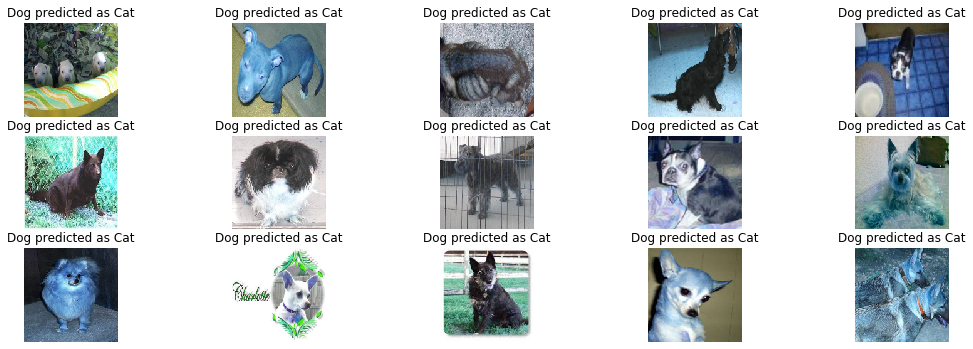

In [0]:
# Get the location of the incorrect predictions for visualization and further analysis
indices = [i for i,v in enumerate(prediction_dogs) if prediction_dogs[i]!=Y_test_dogs_only[i]]
subset_of_wrongly_predicted = [X_test_dogs_only[i] for i in indices ]

plt.figure(figsize = (18,10))
for num, images in enumerate(subset_of_wrongly_predicted):
  plt.subplot(5, 5, num+1)
  plt.title( 'Dog predicted as Cat')
  plt.axis('off')
  plt.imshow(images)